<a href="https://colab.research.google.com/github/PhilNrbts/EvoGame/blob/master/allostasisdepression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt

def softmax(X):
  norm = np.sum(np.exp(X))
  Y = np.exp(X)/norm
  return Y

def normalise(X):
  X= X/np.sum(X,0)
  return X

[[0.7804878  0.7804878  0.7804878  0.        ]
 [0.19512195 0.19512195 0.19512195 0.        ]
 [0.0195122  0.0195122  0.0195122  0.        ]
 [0.00487805 0.00487805 0.00487805 1.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:256: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:283: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


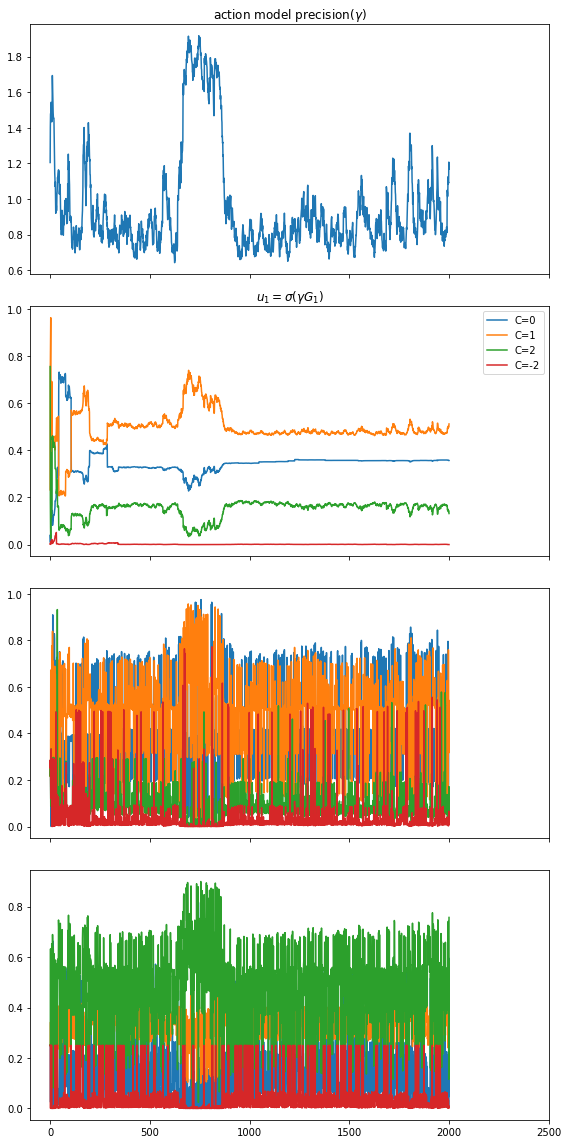

In [ ]:
8#@title
#s1con = np.zeros(4) #context (1,2,3,4)
s1loc = np.zeros((4,4)) #location (1,2,3,4) x time (1,2,3,4)
#o1cue = np.zeros(4) #cues
o2rew = np.zeros(4) #reward

D2aff = np.array([0.5,0.5]) #prior of valence (pos/neg)
D2exh = np.array([0.2,.8]) #prior of exhaustion (high/low)
D2hun = np.array([0.9,0.1]) #prior of hunger (high/low)

betam = np.array([0.5,2])

#D2con = np.array([0.09,0.10,0.90,0.01])

s2aff = D2aff # valence (pos/neg)
#s2con = D2con #context (1,2,3,4)
s2exh = D2exh #exhaustion (++,+,-,--)??
s2hun = D2hun #hunger (++,+,-,--)

A1 = np.zeros((4,4)) #likelihood of outcome (1,2,3,4) given loc (1,2,3,4)

#A2exh = np.zeros((2,4)) #likelihood of outcome s2aff (pos/neg), given s2hun (4)
#A2hun = np.zeros((2,4)) #likelihood of outcome s2aff (pos/neg), given s2exh (4)

B1 = np.zeros((4,4,4)) #state transitions (1,2,3,4)
D1 = np.array([1,0,0,0])
for i in range(4):
  #A1[i,i] = 1
  for j in range(4):

    if i ==j:
      B1[i,:,j] = 0.8
      A1[i,j] = 1#0.8
    if abs(i-j)==1:
      B1[i,:,j] = 0.2
      A1[i,j] = 0#0.015
    if abs(i-j)==2:
      B1[i,:,j] = 0.02
      A1[i,j] = 0#.01
    if abs(i-j)==3:
      B1[i,:,j] = 0.005
      A1[i,j] = 0#.0005

B1[3,3,:]=1.0
B1[0:3,3,:]=0

B2aff = np.zeros((2,2)) #likelihood to transition to other states (potentially even hun and loc?)
B2aff[:,0]=[0.99,0.01] ##probability of feeling good later (yes/no) given good now
B2aff[:,1]=[0.02,0.98] ##probability of feeling good later (yes/no) given bad now


B2exh = np.zeros((2,2)) #likelihood to transition to other states (potentially even hun and loc?)
B2exh[:,0]=[0.95,0.05] ##probability of feeling exhausted later (yes/no) given exhausted now
B2exh[:,1]=[0,1] ##probability of feeling exhausted later (yes/no) given not exhausted now

B2hun = np.zeros((2,2))
B2hun[:,0]=[1.0,0] ##probability of feeling hungry later (yes/no) given hungry now
B2hun[:,1]=[0.05,0.95] ##probability of feeling hungry later (yes/no) given not hungry now


for i in range(4):
  B1[:,:,i] = normalise(B1[:,:,i])#0**gammaB[0])
A1 = normalise(A1)
print(B1[:,:,0])

C0 = np.array([0,1,2,-3]) ### rewards
C1energy = np.array([2,-1,-3,-3]) ## energy preferences
C1hunger = np.array([-2,4,8,-2]) ## food preferences

C1 = np.reshape(C0 + s2exh[0]*C1energy + s2hun[0]*C1hunger,4) #< Casper
#maybe np.dot? np.dot(np.array([[2,0]]),np.array([2,0]))

#C2urg = #softmax*preference comparison: s2exh[0,0]*C1energy - s2hun[0,0]*C1hunger
gammat = np.zeros(3) #action model precision for each fork

global II
II = 0

#def forward (s,o,G):
#  II+= 1
#
#  if II == 4:
##    II=0
#    return G
##  else:
 #   Gu = np.zeros(4)
#    for j in range(4): ##loop over actions
#      s = np.inner(s,B1[:,:,j])
#      o = np.inner(s,A1)
#      Gu[j] += np.dot(o2u1[:,j],(np.log(o2u1[:,j])+C1)) ##first action

#      G[j] 




N = 2000 #number of samples
s2aff = np.zeros((2,N+1))
s2aff[:,0] = D2aff

s2exh = np.zeros((2,N+1))
s2exh[:,0] = D2exh

s2hun = np.zeros((2,N+1))
s2hun[:,0] = D2hun

#s2urg = np.zeros((2,N+1))
#s2urg[:,0] = D2urg

t1 = np.zeros(4) #o1
t2 = np.zeros((4,4,4)) #o1,u1,o2
t3 = np.zeros((4,4,4,4,4)) #o1,u1,o2,u2,o3

G1 = np.zeros((4,4)) ##G given outcome1,action1
G2 = np.zeros((4,4,4,4)) ##G given past + outcome2,action2
G3 = np.zeros((4,4,4,4,4,4)) ##G given past + outcome3,action3

seq = np.zeros((7,N)) ##store sequences, *change 7?

uo1T = np.zeros((4,N))
uo2T = np.zeros((4,N))
uo3T = np.zeros((4,N))

ou2T = np.zeros((4,N))
ou3T = np.zeros((4,N))
ou4T = np.zeros((4,N))


for i in range(N): ##samples
  C1 = np.reshape(C0 + s2exh[0,i]*C1energy + s2hun[0,i]*C1hunger,4)
  #print("sample:",i)
  Eaff = np.zeros(2)
  Eexh = np.zeros(2)
  Ehun = np.zeros(2)
  
  beta = np.dot(s2aff[:,i],betam)
  gammat[:] = beta**-1

  eAC = np.zeros(3)

  ##t = 1
  o1 = np.random.choice(range(4),p=np.inner(D1,A1)) #*

  Eexh[1]+= C1energy[o1] 
  Ehun[1]+= C1hunger[o1]
  Eexh[0]+= -1*C1energy[o1] 
  Ehun[0]+= -1*C1hunger[o1]

  s1 = softmax(np.log(D1+10**-7) + np.log(A1[o1,:]+10**-7))

  #s2u1 = np.zeros(4,4) ##states2 given action at time 1
  #o2u1 = np.zeros(4,4) ##outcomes2 given action at time 1

  if t1[o1] == 0:
    for j in range(4):
      s2u1 = np.inner(s1,B1[:,:,j])
      o2u1 = np.inner(s2u1,A1)

      G1[o1,j] += np.dot(o2u1,(np.log(o2u1+10**-7)+C1))
    t1[o1]=1 ##mark path
  uo1 = softmax(gammat[0]*G1[o1,:])
  u1 = np.random.choice(range(4),p=uo1)



  uo1T[:,i] = uo1
  uo1[u1] +=-1
  eAC[0] = np.dot(uo1,G1[o1,:])


  ###t=2
  s2 = np.inner(s1,B1[:,:,u1])
  ou2 = np.inner(s2,A1)
  ou2T[:,i]=ou2

  o2 = np.random.choice(range(4),p=ou2)

  Eexh[1]+= C1energy[o2] 
  Ehun[1]+= C1hunger[o2]

  Eexh[0]+= -1*C1energy[o2] 
  Ehun[0]+= -1*C1hunger[o2]

  s2 = softmax(np.log(s2+10**-7) + np.log(A1[o2,:]+10**-7))

  #G2 = np.zeros(4) ##G given action1
  if t2[o1,u1,o2]==0:
    for j in range(4):
      s3u2 = np.inner(s2,B1[:,:,j])
      o3u2 = np.inner(s3u2,A1)
      #G2[o1,u1,o2,j] += np.dot(o3u2,(np.log(o3u2+10**-7)+C1))
      G2[o1,u1,o2,j] += np.dot(o3u2,(np.log(o3u2+10**-7)))
  
  uo2 = softmax(gammat[1]*G2[o1,u1,o2,:])
  uo2T[:,i] = uo2
  if t2[o1,u1,o2]==0:
    G1[o1,u1] += ou2[o2]*np.dot(uo2,G2[o1,u1,o2,:])
    t2[o1,u1,o2]=1 
  u2 = np.random.choice(range(4),p=uo2) ##sample action2


  uo2[u2] +=-1
  eAC[1] = np.dot(uo2,G2[o1,u1,o2,:])
  
  ###t=3
  s3 = np.inner(s2,B1[:,:,u2])
  ou3=np.inner(s3,A1)
  ou3T[:,i]=ou3
  o3 = np.random.choice(range(4),p=ou3) ###sample outcome3

  Eexh[1]+= C1energy[o3] 
  Ehun[1]+= C1hunger[o3]

  Eexh[0]+= -1*C1energy[o3] 
  Ehun[0]+= -1*C1hunger[o3]

  s3 = softmax(np.log(s3+10**-7) + np.log(A1[o3,:]+10**-7))
  #G3 = np.zeros(4) ##G given action1

  if t3[o1,u1,o2,u2,o3]==0:
    for j in range(4):
      s4u3 = np.inner(s3,B1[:,:,j])
      o4u3 = np.inner(s4u3,A1)
      G3[o1,u1,o2,u2,o3,j] += np.dot(o4u3,(np.log(o4u3+10**-7)+C1))
    #G1[o1,:] += G3[o1,u1,o2,u2,o3,:]
    #G2[o1,u1,o2,:] += G3[o1,u1,o2,u2,o3,:]
    
  uo3 = softmax(gammat[2]*G3[o1,u1,o2,u2,o3,:])
  uo3T[:,i] = uo3
  if t3[o1,u1,o2,u2,o3]==0:
    Gadd = ou3[o3]*np.dot(uo3,G3[o1,u1,o2,u2,o3,:])
    G1[o1,u1] += ou2[o2]*Gadd
    G2[o1,u1,o2,u2] += Gadd
    t3[o1,u1,o2,u2,o3]=1

  u3 = np.random.choice(range(4),p=uo3) ##sample action3
  uo3[u3] +=-1 ##calc diff prior post
  eAC[2] = np.dot(uo3,G3[o1,u1,o2,u2,o3,:])
  

  ###t=4
  s4 = np.inner(s3,B1[:,:,u3])

  ou4 = np.inner(s4,A1)
  ou4T[:,i]=ou4
  o4 = np.random.choice(range(4),p=ou4) ###sample outcome4
  s4 = softmax(np.log(s4+10**-7) + np.log(A1[o4,:]+0.01**-7))

  Eexh[1]+= C1energy[o4] 
  Ehun[1]+= C1hunger[o4]

  Eexh[0]+= -1*C1energy[o4] 
  Ehun[0]+= -1*C1hunger[o4]

  for t in range(3):
    Eaff += -1*np.log((betam-eAC[t])/betam+10**-7)+np.log(1-eAC[t]*beta**-1+10**-7)

  Eaff[np.isnan(Eaff)]=0

  ####effect of evidence from present trial:
  s2aff[:,i] = softmax(np.log(s2aff[:,i]+10**-7) + 0.2*Eaff)
  s2exh[:,i] = softmax(np.log(s2exh[:,i]+10**-7) + 0.1*Eexh)
  s2hun[:,i] = softmax(np.log(s2hun[:,i]+10**-7) + 0.1*Ehun)

  ####effect of evidence from present trial:
  s2aff[:,i+1] = np.inner(s2aff[:,i],B2aff)
  s2exh[:,i+1] = np.inner(s2exh[:,i],B2exh)
  s2hun[:,i+1] = np.inner(s2hun[:,i],B2hun)

  seq[:,i] = [o1,u1,o2,u2,o3,u3,o4]

#for i in range(4): #4 o1
#  st = softmax(np.log(D1) + np.log(A1[i,:]))

plt.figure(figsize=(8,16))
plt.subplot(4,1,1)
plt.plot(s2aff[0,:]*betam[0]**-1 + s2aff[1,:]*betam[1]**-1)#, label='$\gamma$')
plt.title('action model precision($\gamma$)')
plt.xticks([0,500,1000,1500,2000,2500],[])
plt.subplot(4,1,2)

labels = ['C=0','C=1', 'C=2', 'C=-2']
plt.subplot(4,1,2)
for i in range(4):
  plt.plot(np.arange(N),uo1T[i,:],label=labels[i])

plt.title("$u_{1} = \sigma(\gamma G_1)$")
plt.legend()
plt.xticks([0,500,1000,1500,2000,2500],[])
plt.subplot(4,1,3)
for i in range(4):
  plt.plot(np.arange(N),uo2T[i,:],label=labels[i])
plt.xticks([0,500,1000,1500,2000,2500],[])
plt.subplot(4,1,4)
for i in range(4):
  plt.plot(np.arange(N),uo3T[i,:],label=labels[i])
  
plt.xticks([0,500,1000,1500,2000,2500])
plt.tight_layout()

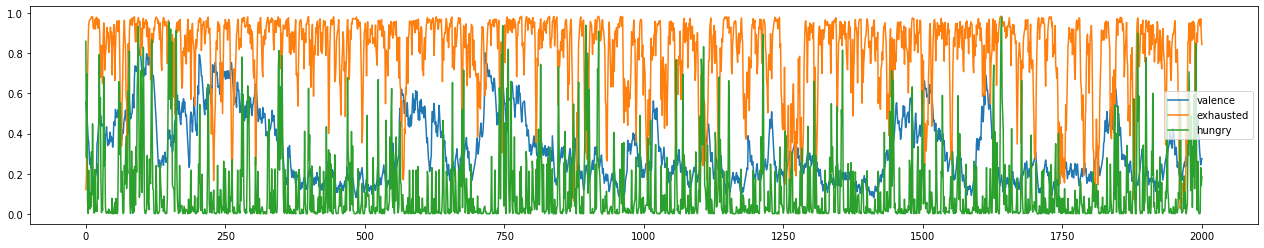

In [ ]:
plt.figure(figsize=(22,4))
plt.plot(s2aff[0,:],label='valence')
plt.plot(s2exh[0,:],label='exhausted')
plt.plot(s2hun[0,:],label='hungry')
plt.legend()
#plt.plot(s2exh[1,:])
#plt.plot(s2hun[1,:])

In [ ]:
print(np.shape(C0))
C1 = C0 + s2exh[0,i]*C1energy + s2hun[0,i]*C1hunger
C1 = np.reshape(C1,4)
print(np.shape(C1))

C1 = np.reshape(C1,4)

(4,)
(4,)


In [ ]:
S0test = np.array([0.2,0.8])

B2exh[:,0]=[0.98,0.02] ##probability of feeling exhausted later (yes/no) given exhausted now
B2exh[:,1]=[0,1] ##probability of feeling exhausted later (yes/no) given not exhausted now

S2test = np.inner(S0test,B2exh)
print(S2test)
%who

[0.196 0.804]
A1	 B1	 B2aff	 B2exh	 B2hun	 C0	 C1	 C1energy	 C1hunger	 
D1	 D2aff	 D2exh	 D2hun	 Eaff	 Eexh	 Ehun	 G1	 G2	 
G3	 Gadd	 II	 N	 S0test	 S2test	 beta	 betam	 eAC	 
gammat	 i	 j	 labels	 normalise	 np	 o1	 o2	 o2rew	 
o2u1	 o3	 o3u2	 o4	 o4u3	 ou2	 ou2T	 ou3	 ou3T	 
ou4	 ou4T	 plt	 s1	 s1loc	 s2	 s2aff	 s2exh	 s2hun	 
s2u1	 s3	 s3u2	 s4	 s4u3	 seq	 softmax	 t	 t1	 
t2	 t3	 u1	 u2	 u3	 uo1	 uo1T	 uo2	 uo2T	 
uo3	 uo3T	 
